#Importing datasets

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import string
import keras


In [ ]:
!mkdir datasets

In [ ]:
#Drop the 2 zip files to upload the unzip thru
!unzip "/content/creditcard.csv.zip" -d datasets
!unzip "/content/fraudTest.csv.zip" -d datasets

Archive:  /content/creditcard.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/creditcard.csv.zip or
        /content/creditcard.csv.zip.zip, and cannot find /content/creditcard.csv.zip.ZIP, period.
Archive:  /content/fraudTest.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/fraudTest.csv.zip or
        /content/fraudTest.csv.zip.zip, and cannot find /content/fraudTest.csv.zip.ZIP, period.


#Dataset 1: creditcard.csv

In [ ]:
#importing dataset2
data2 = pd.read_csv('/content/datasets/creditcard.csv')

#Exploring data
print(data2.columns)

data2.shape

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


(284807, 31)

In [ ]:
print(data2.head())


         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


In [ ]:
#Drop Time coloumn
data2.drop('Time', axis = 1, inplace = True)

print(data2.head())

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


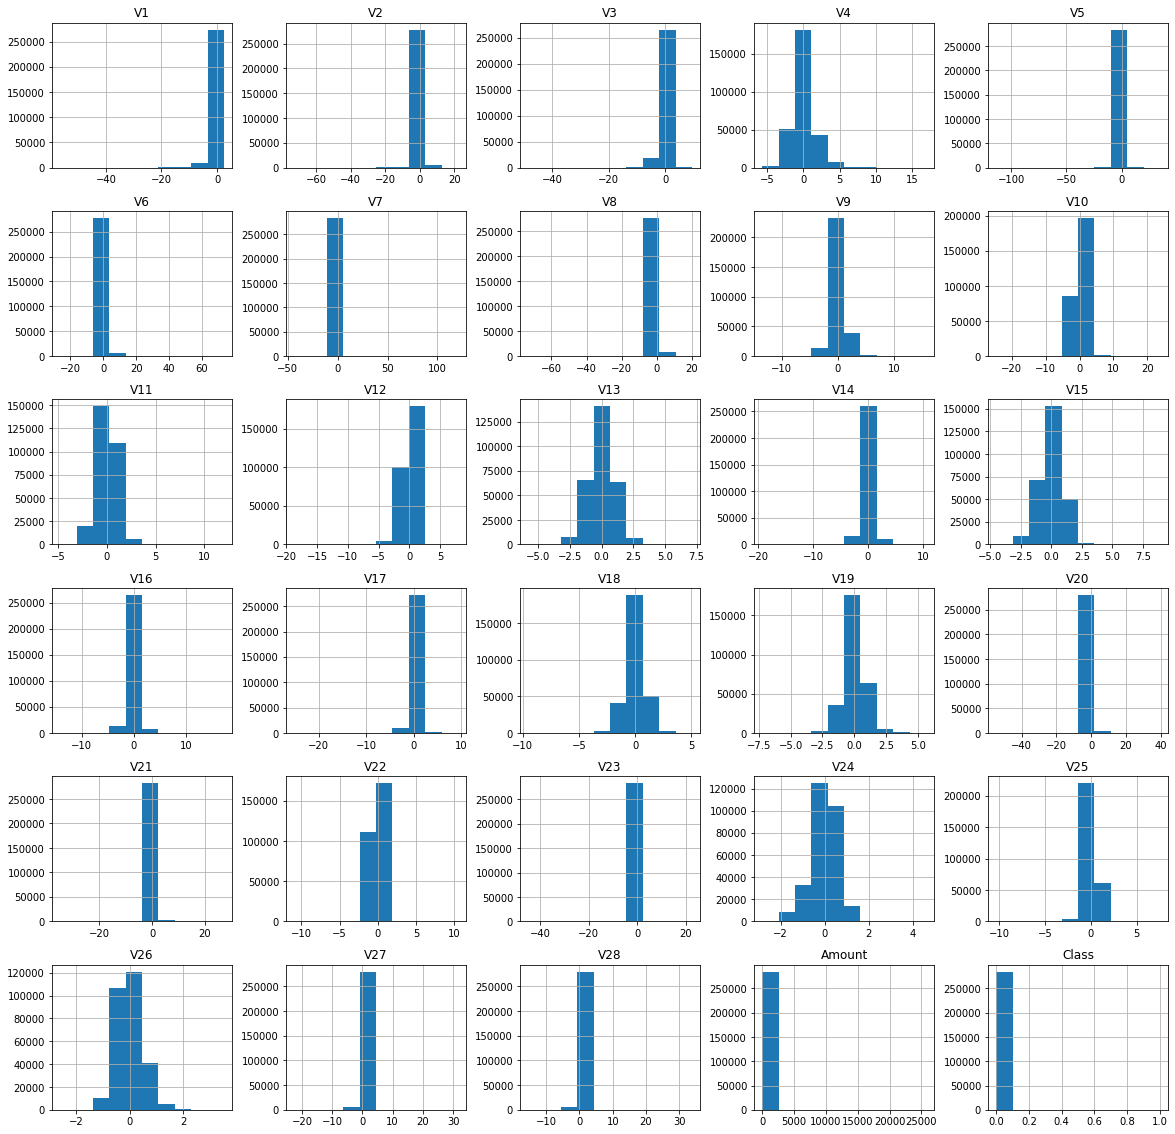

In [ ]:
# plot histogram of each parameter
data2.hist(figsize = (20, 20))
plt.show()

In [ ]:
cases = len(data2)
nonfraud_cases = len(data2[data2.Class == 0])
fraud_cases = len(data2[data2.Class == 1])
fraud_percentage = round(fraud_cases/nonfraud_cases*100, 2)
outlier_fraction = fraud_cases / float(cases)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))

print('-----------------------------------')
print('Total number of cases: {}'.format(cases))
print('Number of Non-fraud cases: {}'.format(nonfraud_cases))
print('Number of Fraud cases: {}'.format(fraud_cases))
print('Percentage of fraud cases: {}'.format(fraud_percentage))
print('------------------------------------')

print('Outlier: {}'.format(outlier_fraction))
print('------------------------------------')




CASE COUNT
-----------------------------------
Total number of cases: 284807
Number of Non-fraud cases: 284315
Number of Fraud cases: 492
Percentage of fraud cases: 0.17
------------------------------------
Outlier: 0.001727485630620034
------------------------------------


In [ ]:
#Data split to Test and Train
from sklearn.model_selection import train_test_split # data split

X = data2.drop('Class', axis = 1).values # X includes everything except our class column
Y = data2['Class'].values # Y includes all the class labels for each sample

#Splitting dataset into 20% test and 80% train
# random_state helps assure that you always get the same output when you split the data, helps create reproducible results 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('Y_train samples : ', attrs = ['bold']), Y_train[0:20])
print(cl('Y_test samples : ', attrs = ['bold']), Y_test[0:20])

X_train samples :  [[-1.11504743e+00  1.03558276e+00  8.00712441e-01 -1.06039825e+00
   3.26211690e-02  8.53422160e-01 -6.14243480e-01 -3.23116112e+00
   1.53994798e+00 -8.16908791e-01 -1.30559201e+00  1.08177199e-01
  -8.59609580e-01 -7.19342108e-02  9.06655628e-01 -1.72092961e+00
   7.97853221e-01 -6.75939779e-03  1.95677806e+00 -6.44895565e-01
   3.02038533e+00 -5.39617976e-01  3.31564886e-02 -7.74945766e-01
   1.05867812e-01 -4.30853482e-01  2.29736936e-01 -7.05913036e-02
   1.29500000e+01]]
X_test samples :  [[-3.23333572e-01  1.05745525e+00 -4.83411518e-02 -6.07204308e-01
   1.25982115e+00 -9.17607168e-02  1.15910150e+00 -1.24334606e-01
  -1.74639536e-01 -1.64440065e+00 -1.11886302e+00  2.02647310e-01
   1.14596495e+00 -1.80235956e+00 -2.47177932e-01 -6.09453515e-02
   8.46605738e-01  3.79454387e-01  8.47262245e-01  1.86409421e-01
  -2.07098267e-01 -4.33890272e-01 -2.61613283e-01 -4.66506063e-02
   2.11512300e-01  8.29721214e-03  1.08494430e-01  1.61139167e-01
   4.00000000e+01]]

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
sc = StandardScaler()
amount = data2['Amount'].values

data2['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(data2['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


Classification algorithms

In [ ]:
# Applying Classification Algorithms
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, Y_train)
tree_Yhat = tree_model.predict(X_test)

print(tree_Yhat)




[0 0 0 ... 0 0 0]


In [ ]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

n = 10

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)
knn_Yhat = knn.predict(X_test)


In [ ]:
# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, Y_train)
lr_Yhat = lr.predict(X_test)


In [ ]:
# 4. SVM
from sklearn.svm import SVC 

svm = SVC()
svm.fit(X_train, Y_train)
svm_Yhat = svm.predict(X_test)

Neural Networks

In [ ]:
#Deep neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

DNN = Sequential([
Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

DNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
DNN.fit(X_train, Y_train, batch_size=15, epochs=5)

#Neural Network Accuracy
DNN_Yhat = (DNN.predict(X_test) > 0.5).astype("int32")

Epoch 1/5
15190/15190 [==============================] - 46s 3ms/step - loss: 0.0271 - accuracy: 0.9983
Epoch 2/5
15190/15190 [==============================] - 41s 3ms/step - loss: 0.0070 - accuracy: 0.9990
Epoch 3/5
15190/15190 [==============================] - 53s 3ms/step - loss: 0.0060 - accuracy: 0.9991
Epoch 4/5
15190/15190 [==============================] - 51s 3ms/step - loss: 0.0064 - accuracy: 0.9992
Epoch 5/5
15190/15190 [==============================] - 38s 2ms/step - loss: 0.0058 - accuracy: 0.9992


Calculate Evaluation metric for each implemented model

In [ ]:
# Accuracy score = No.of correct predictions / Total no.of predictions
from sklearn.metrics import accuracy_score
print(cl('ACCURACY SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree model accuracy is {}'.format(accuracy_score(Y_test, tree_Yhat)))
print('KNN model accuracy is {}'.format(accuracy_score(Y_test, knn_Yhat)))
print("Logistic Regression model accuracy is {}".format(accuracy_score(Y_test, lr_Yhat)))
print('SVM model accuracy is {}'.format(accuracy_score(Y_test, svm_Yhat)))
print('Deep Neural Network model accuracy is {}'.format(accuracy_score(Y_test, DNN_Yhat)))

ACCURACY SCORE
--------------------------------------------------------------
Decision tree model accuracy is 0.9993679997191109
KNN model accuracy is 0.9992451107756047
Logistic Regression model accuracy is 0.9991924440855307
SVM model accuracy is 0.998735999438222
Deep Neural Network model accuracy is 0.9993328885923949


In [ ]:
#precision score
from sklearn.metrics import precision_score
print(cl('PRECISION SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree model precision score is {}'.format(precision_score(Y_test, tree_Yhat)))
print('KNN model precision score is {}'.format(precision_score(Y_test, knn_Yhat)))
print('Logistic Regression model precision score is {}'.format(precision_score(Y_test, lr_Yhat)))
print('SVM model precision score is {}'.format(precision_score(Y_test, svm_Yhat)))
print('Deep Neural Network model precision score is {}'.format(precision_score(Y_test, DNN_Yhat)))


PRECISION SCORE
--------------------------------------------------------------
Decision tree model precision score is 0.8651685393258427
KNN model precision score is 0.9142857142857143
Logistic Regression model precision score is 0.8767123287671232
SVM model precision score is 0.8372093023255814
Deep Neural Network model precision score is 0.8058252427184466


In [ ]:
#recall score
from sklearn.metrics import recall_score
print(cl('RECALL SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree recall is {}'.format(recall_score(Y_test, tree_Yhat)))
print('KNN model recall is {}'.format(recall_score(Y_test, knn_Yhat)))
print('Logistic Regression model recall is {}'.format(recall_score(Y_test, lr_Yhat)))
print('SVM model recall is {}'.format(recall_score(Y_test, svm_Yhat)))
print('Deep Neural Network model recall is {}'.format(recall_score(Y_test, DNN_Yhat)))

RECALL SCORE
--------------------------------------------------------------
Decision tree recall is 0.7623762376237624
KNN model recall is 0.6336633663366337
Logistic Regression model recall is 0.6336633663366337
SVM model recall is 0.3564356435643564
Deep Neural Network model recall is 0.8217821782178217


In [ ]:
# F1 score = 2( (precision * recall) / (precision + recall) )
from sklearn.metrics import f1_score
print(cl('F1 SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree f1 score is {}'.format(f1_score(Y_test, tree_Yhat)))
print('KNN model f1 score is {}'.format(f1_score(Y_test, knn_Yhat)))
print('Logistic Regression model f1 score is {}'.format(f1_score(Y_test, lr_Yhat)))
print('SVM model f1 score is {}'.format(f1_score(Y_test, svm_Yhat)))
print('Deep Neural Network model f1 score is {}'.format(f1_score(Y_test, DNN_Yhat)))

F1 SCORE
--------------------------------------------------------------
Decision tree f1 score is 0.8105263157894738
KNN model f1 score is 0.7485380116959064
Logistic Regression model f1 score is 0.7356321839080459
SVM model f1 score is 0.5
Deep Neural Network model f1 score is 0.8137254901960784


# Dataset 2: fraudTest.csv 
(split off from a dataset too large to work with)

In [ ]:
#importing dataset3
data3 = pd.read_csv('/content/datasets/fraudTest.csv')

#Exploring data
print(data3.columns)

data3.shape

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


(555719, 23)

In [ ]:
print(data3.head())

   Unnamed: 0 trans_date_trans_time  ...  merch_long is_fraud
0           0   2020-06-21 12:14:25  ...  -81.200714        0
1           1   2020-06-21 12:14:33  ... -109.960431        0
2           2   2020-06-21 12:14:53  ...  -74.196111        0
3           3   2020-06-21 12:15:15  ...  -80.883061        0
4           4   2020-06-21 12:15:17  ...  -85.884734        0

[5 rows x 23 columns]


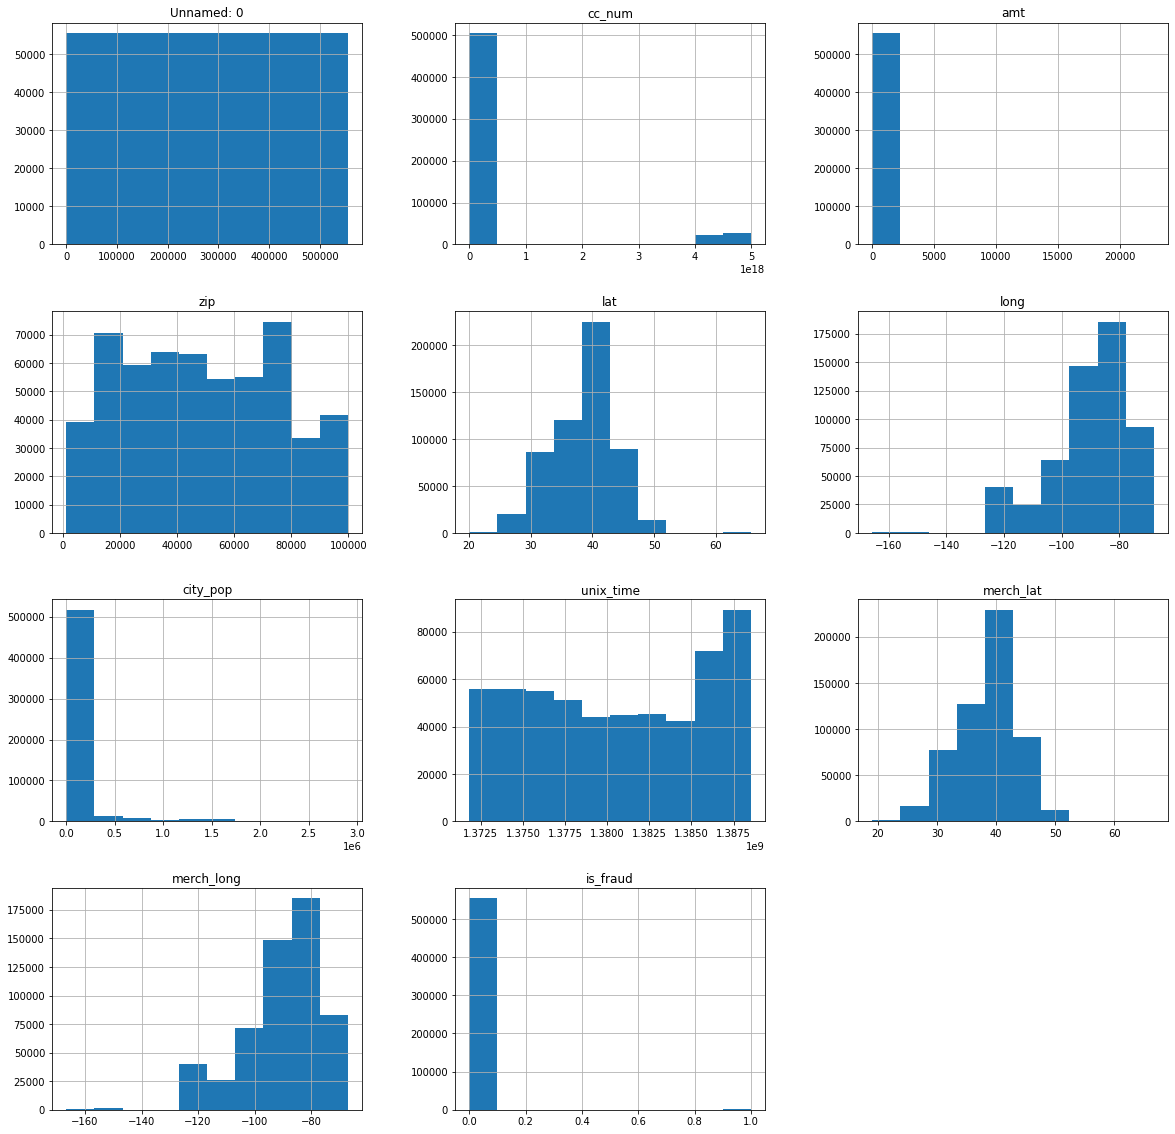

In [ ]:
# plot histogram of each parameter
data3.hist(figsize = (20, 20))
plt.show()

In [ ]:
cases = len(data3)
nonfraud_cases = len(data3[data3.is_fraud == 0])
fraud_cases = len(data3[data3.is_fraud == 1])
fraud_percentage = round(fraud_cases/nonfraud_cases*100, 2)
outlier_fraction = fraud_cases / float(cases)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))

print('-----------------------------------')
print('Total number of cases: {}'.format(cases))
print('Number of Non-fraud cases: {}'.format(nonfraud_cases))
print('Number of Fraud cases: {}'.format(fraud_cases))
print('Percentage of fraud cases: {}'.format(fraud_percentage))
print('------------------------------------')

print('Outlier: {}'.format(outlier_fraction))
print('------------------------------------')


CASE COUNT
-----------------------------------
Total number of cases: 555719
Number of Non-fraud cases: 553574
Number of Fraud cases: 2145
Percentage of fraud cases: 0.39
------------------------------------
Outlier: 0.0038598644278853163
------------------------------------


In [ ]:
#Data split to Test and Train
from sklearn.model_selection import train_test_split # data split

X = data3.drop('is_fraud', axis = 1).values # X includes everything except our class column
Y = data3['is_fraud'].values # Y includes all the class labels for each sample

#Splitting dataset into 20% test and 80% train
# random_state helps assure that you always get the same output when you split the data, helps create reproducible results 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('Y_train samples : ', attrs = ['bold']), Y_train[0:20])
print(cl('Y_test samples : ', attrs = ['bold']), Y_test[0:20])

X_train samples :  [[427945 '2020-12-03 19:57:19' 4129767952109660 'fraud_Hilpert-Conroy'
  'kids_pets' 77.05 'Cheryl' 'Ballard' 'F' '248 James Squares Apt. 838'
  'Halstad' 'MN' 56548 47.3551 -96.798 771 'Scientist, audiological'
  '1972-06-14' '104c675dde4d51cc2fcba2e489920f76' 1386100639 47.45382
  -96.779004]]
X_test samples :  [[102051 '2020-07-27 01:15:09' 4789911625179723 'fraud_Heidenreich PLC'
  'grocery_pos' 218.76 'Dorothy' 'Zuniga' 'F' '77321 Ford Via' 'Moriches'
  'NY' 11955 40.8095 -72.8229 3285 'Research officer, trade union'
  '1988-04-27' 'c628b8cb043efb046bbae2b80949f62a' 1374887709
  40.15368400000001 -73.445235]]
Y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # data normalization

le = preprocessing.LabelEncoder()
h
sc = StandardScaler()
amount = data2['Amount'].values

data2['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(data2['Amount'].head(10), attrs = ['bold']))

In [ ]:
# Applying Classification Algorithms
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, Y_train)
tree_Yhat = tree_model.predict(X_test)

ValueError: ignored

In [ ]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

n = 10

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)
knn_Yhat = knn.predict(X_test)

In [ ]:
# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, Y_train)
lr_Yhat = lr.predict(X_test)

In [ ]:
# 4. SVM
from sklearn.svm import SVC 

svm = SVC()
svm.fit(X_train, Y_train)
svm_Yhat = svm.predict(X_test)

In [ ]:
#Deep neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

DNN = Sequential([
Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

DNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
DNN.fit(X_train, Y_train, batch_size=15, epochs=5)

#Neural Network prediction
DNN_Yhat = (DNN.predict(X_test) > 0.5).astype("int32")

In [ ]:
# Accuracy score = No.of correct predictions / Total no.of predictions
from sklearn.metrics import accuracy_score
print(cl('ACCURACY SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree model accuracy is {}'.format(accuracy_score(Y_test, tree_Yhat)))
print('KNN model accuracy is {}'.format(accuracy_score(Y_test, knn_Yhat)))
print("Logistic Regression model accuracy is {}".format(accuracy_score(Y_test, lr_Yhat)))
print('SVM model accuracy is {}'.format(accuracy_score(Y_test, svm_Yhat)))

ACCURACY SCORE
--------------------------------------------------------------
Decision tree model accuracy is 0.9993679997191109
KNN model accuracy is 0.9992451107756047
Logistic Regression model accuracy is 0.9991924440855307
SVM model accuracy is 0.998735999438222


In [ ]:
#precision score
from sklearn.metrics import precision_score
print(cl('PRECISION SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree model precision score is {}'.format(precision_score(Y_test, tree_Yhat)))
print('KNN model precision score is {}'.format(precision_score(Y_test, knn_Yhat)))
print('Logistic Regression model precision score is {}'.format(precision_score(Y_test, lr_Yhat)))
print('SVM model precision score is {}'.format(precision_score(Y_test, svm_Yhat)))


PRECISION SCORE
--------------------------------------------------------------
Decision tree model precision score is 0.8651685393258427
KNN model precision score is 0.9142857142857143
Logistic Regression model precision score is 0.8767123287671232
SVM model precision score is 0.8372093023255814


In [ ]:
#recall score
from sklearn.metrics import recall_score
print(cl('RECALL SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree recall is {}'.format(recall_score(Y_test, tree_Yhat)))
print('KNN model recall is {}'.format(recall_score(Y_test, knn_Yhat)))
print('Logistic Regression model recall is {}'.format(recall_score(Y_test, lr_Yhat)))
print('SVM model recall is {}'.format(recall_score(Y_test, svm_Yhat)))

RECALL SCORE
--------------------------------------------------------------
Decision tree recall is 0.7623762376237624
KNN model recall is 0.6336633663366337
Logistic Regression model recall is 0.6336633663366337
SVM model recall is 0.3564356435643564


In [ ]:
# F1 score = 2( (precision * recall) / (precision + recall) )
from sklearn.metrics import f1_score
print(cl('F1 SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('Decision tree f1 score is {}'.format(f1_score(Y_test, tree_Yhat)))
print('KNN model f1 score is {}'.format(f1_score(Y_test, knn_Yhat)))
print('Logistic Regression model f1 score is {}'.format(f1_score(Y_test, lr_Yhat)))
print('SVM model f1 score is {}'.format(f1_score(Y_test, svm_Yhat)))

F1 SCORE
--------------------------------------------------------------
Decision tree f1 score is 0.8105263157894738
KNN model f1 score is 0.7485380116959064
Logistic Regression model f1 score is 0.7356321839080459
SVM model f1 score is 0.5
